In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel(r"C:\Users\Lenovo\Desktop\data science\data science(ml)\machine_learning exam 2\Flight_Price_Train.xlsx")
dt=pd.read_excel(r"C:\Users\Lenovo\Desktop\data science\data science(ml)\machine_learning exam 2\Flight_Price_Test.xlsx")

# Perform Feature Engineering

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
dt.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
df.shape

(10683, 11)

In [6]:
dt.shape

(2671, 10)

In [7]:
df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [8]:
dt.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [9]:
df.duplicated().sum()

220

In [10]:
dt.duplicated().sum()

26

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
df.Route.fillna("DEL → BOM → COK ",inplace=True)
df.Total_Stops.fillna("1 stop",inplace=True)

In [13]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
dt.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [15]:
# Convert 'Date_of_Journey' to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1444\2000236211.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])


In [16]:
# Extract Date, Month, and Year
df['Journey_Date'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df['Journey_Year'] = df['Date_of_Journey'].dt.year

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019


In [18]:
df=df.drop(['Date_of_Journey'],axis=1)

# Perform Exploratory Data Analysis (EDA) tasks

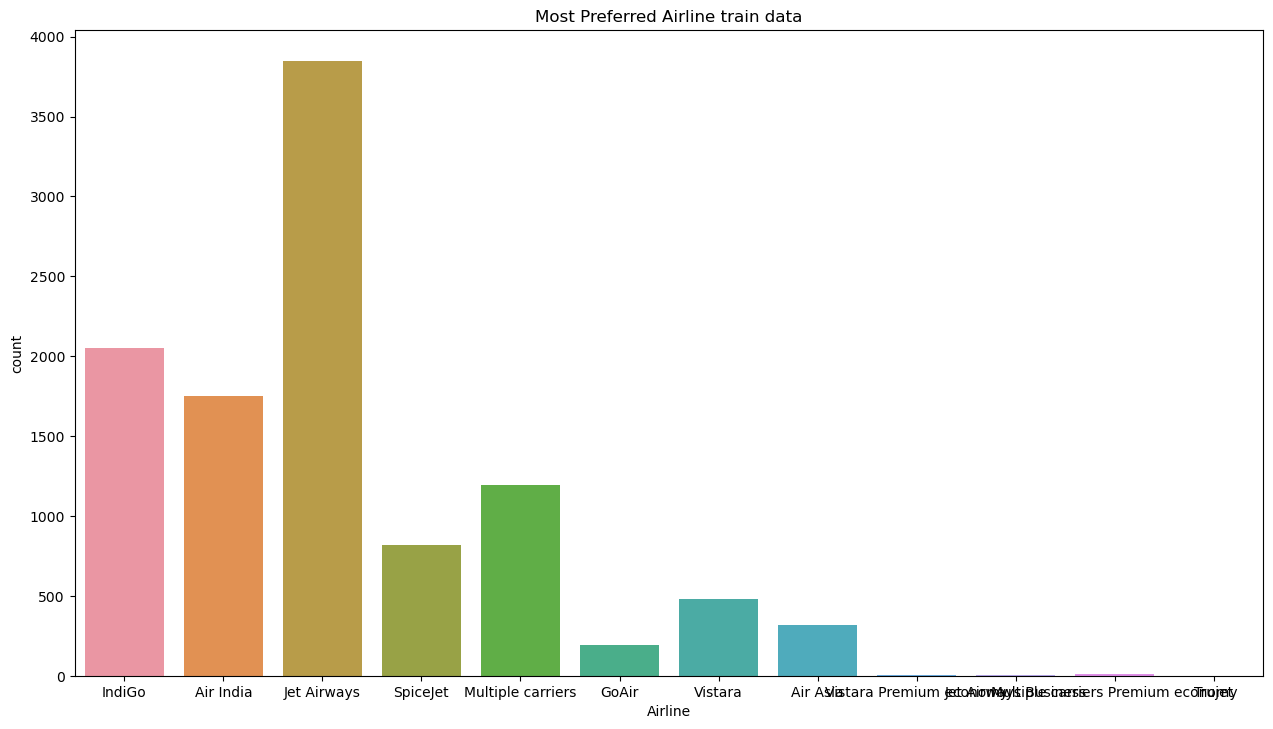

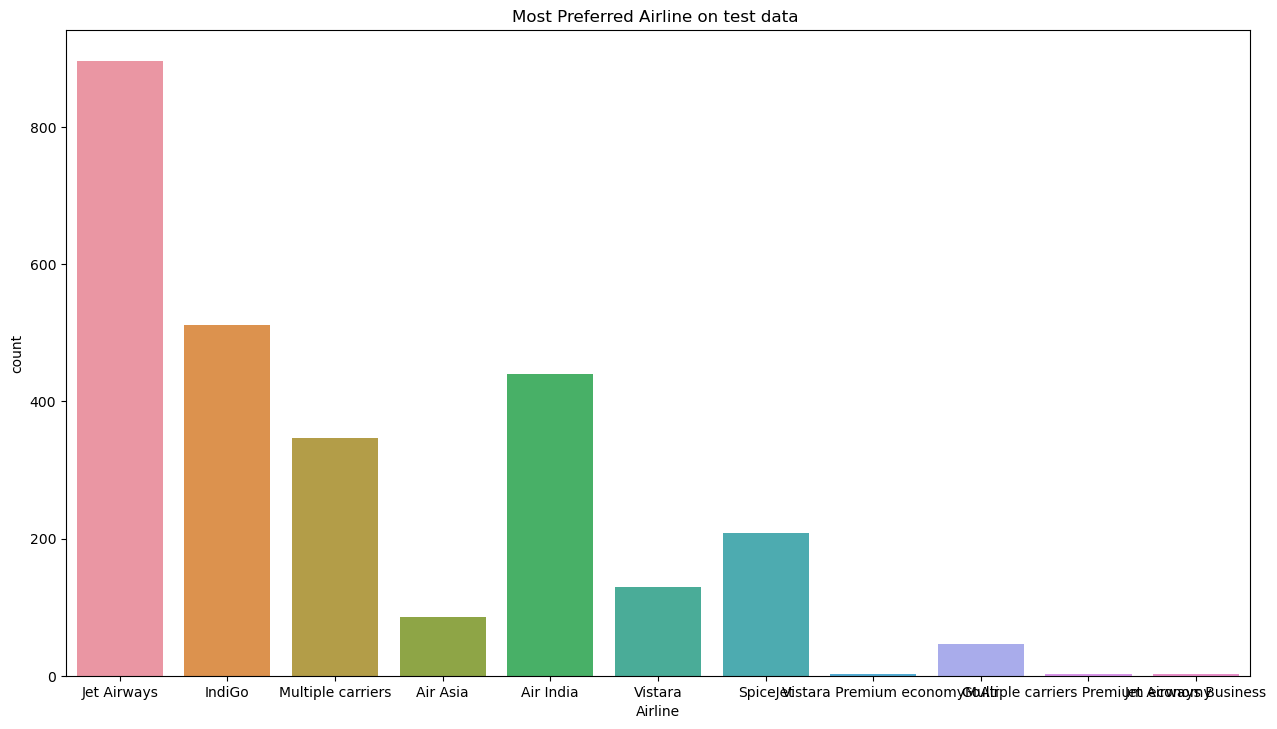

In [19]:
# Visualizations
plt.figure(figsize=(25, 14))

# Countplot for most preferred airline
plt.subplot(2, 2, 1)
sns.countplot(x='Airline', data=df)
plt.title('Most Preferred Airline train data')
plt.tight_layout()
plt.show()



plt.figure(figsize=(25, 14))

# Countplot for most preferred airline
plt.subplot(2, 2, 1)
sns.countplot(x='Airline', data=dt)
plt.title('Most Preferred Airline on test data ')
plt.tight_layout()
plt.show()

In [20]:
# The above barchar we can seee  that most preferred airline in both train and test is Jet Airways

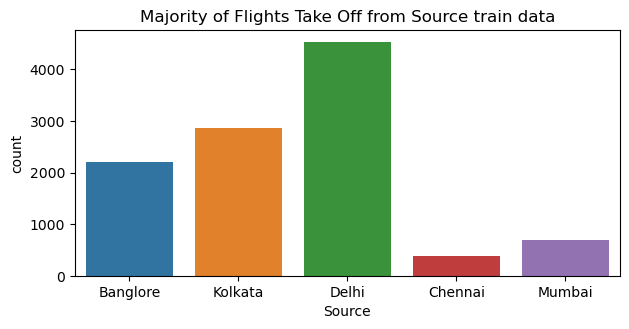

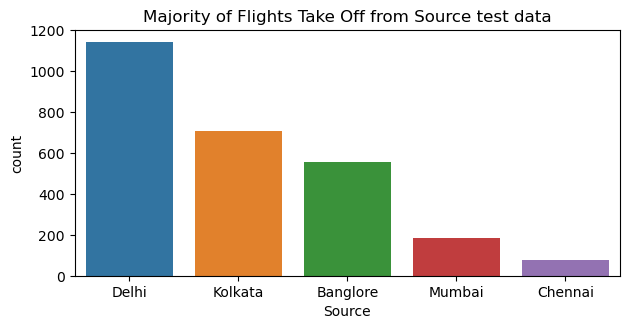

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 2)
sns.countplot(x='Source', data=df)
plt.title('Majority of Flights Take Off from Source train data')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 2)
sns.countplot(x='Source', data=dt)
plt.title('Majority of Flights Take Off from Source test data')
plt.tight_layout()
plt.show()




In [22]:
# In the above barchat tells majority of flights take off from delhi on train and test data

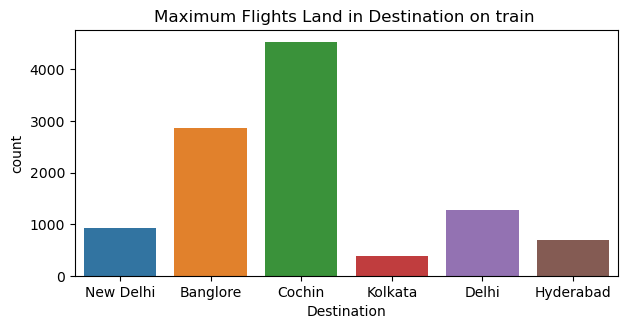

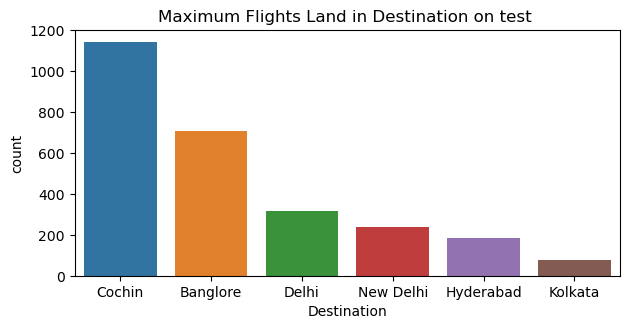

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 3)
sns.countplot(x='Destination', data=df)
plt.title('Maximum Flights Land in Destination on train ')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 3)
sns.countplot(x='Destination', data=dt)
plt.title('Maximum Flights Land in Destination on test ')
plt.tight_layout()
plt.show()

In [24]:
# In this the above barchat tells us maximum fight land destination was cochin train and test data 

# Compare independent features with Target feature to check the impact on price

In [25]:
# 1 .Which airline has the highest price
Airline_highest_price= df.loc[df["Price"].idxmax(),"Airline"]
Airline_highest_price

'Jet Airways Business'

In [26]:
#2.Check if the business class flights are high price
#or low and find only those flights which price is higher than 50k
business_class_high_price = df[(df['Additional_Info'] == 'Business class')
                                         & (df['Price'] > 50000)]
business_class_high_price

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Journey_Year
2924,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512,3,1,2019
5372,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427,3,1,2019
10364,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209,3,1,2019


# Perform encoding for the required features according to the data

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [28]:
df[df.select_dtypes(include='object').columns]=df[df.select_dtypes(include='object').columns].apply(le.fit_transform)

# Performing train_test_split

In [29]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=.2)

In [30]:
df_train_x = df_train.iloc[:,list(range(0,10))+[11]]
df_train_y = df_train.iloc[:,-4]

df_test_x = df_test.iloc[:,list(range(0,10))+[11]]
df_test_y = df_test.iloc[:,-4]

In [31]:
df_train_x

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month
10442,4,0,2,18,58,824,280,4,5,4544,4
10658,4,0,2,18,88,937,241,4,5,5769,6
8700,3,1,4,128,93,936,235,4,8,4332,3
10129,3,0,5,0,123,1149,307,0,8,11873,3
6898,1,2,1,97,147,1130,198,1,8,9653,6
...,...,...,...,...,...,...,...,...,...,...,...
61,1,2,1,122,34,670,206,0,8,5117,3
661,4,2,1,104,205,431,326,0,5,6017,3
4624,4,0,5,5,94,466,87,0,8,13555,3
5579,4,2,1,104,66,1077,365,0,5,15400,6


In [32]:
df_train_y

10442     4544
10658     5769
8700      4332
10129    11873
6898      9653
         ...  
61        5117
661       6017
4624     13555
5579     15400
760      14871
Name: Price, Length: 8546, dtype: int64

# Build multiple model by using different algorithm

In [33]:
#LinearRegression model
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

In [34]:
linear_reg.fit(df_train_x, df_train_y)

LinearRegression()

In [35]:
linear_reg_preds = linear_reg.predict(df_test_x)
linear_reg_preds

array([ 3873.,  3100., 16704., ..., 11667.,  4939., 10368.])

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [37]:
linear_reg_mse = mean_squared_error(df_test_y, linear_reg_preds)
linear_reg_mse

6.998499081120993e-23

In [38]:
#DecisionTree model 
from sklearn .tree import DecisionTreeRegressor
decision_tree_reg=DecisionTreeRegressor()

In [39]:
decision_tree_reg.fit(df_train_x, df_train_y)

DecisionTreeRegressor()

In [40]:
decision_tree_preds = decision_tree_reg.predict(df_test_x)

In [41]:
decision_tree_mse= mean_squared_error(df_test_y, decision_tree_preds)
decision_tree_mse

264.9845577912962

In [42]:
#andomForest
from sklearn.ensemble import RandomForestRegressor
random_forest_reg=RandomForestRegressor()

In [43]:
random_forest_reg.fit(df_train_x, df_train_y)

RandomForestRegressor()

In [44]:
random_forest_preds = random_forest_reg.predict(df_test_x)

In [45]:
random_forest_mse = mean_squared_error(df_test_y, random_forest_preds)
random_forest_mse

1876.285194478236

# Compare all of the models

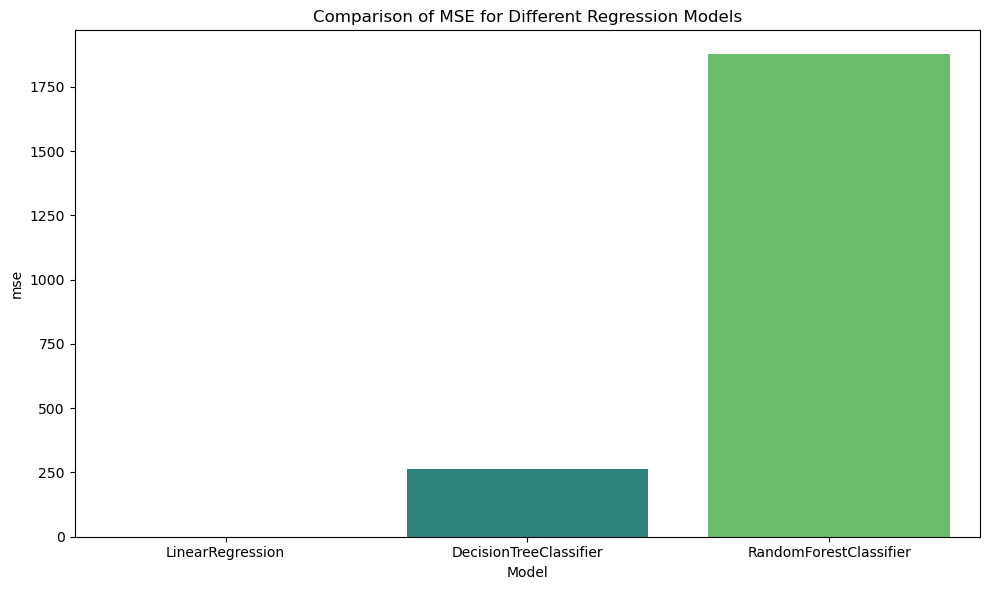

In [50]:
models = ['LinearRegression', 'DecisionTreeClassifier','RandomForestClassifier']
mse_values=[linear_reg_mse,decision_tree_mse,random_forest_mse]
final_model = pd.DataFrame({'Model': models, 'mse': mse_values})

# Plot the results using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='mse', data=final_model, palette='viridis')
plt.title('Comparison of MSE for Different Regression Models')
plt.tight_layout()
plt.show()

In [51]:
final_model

,Model,mse
0,LinearRegression,6.998499e-23
1,DecisionTreeClassifier,2.649846e+02
2,RandomForestClassifier,1.876285e+03


# conclusion from the business point of view

Business conclusion
You can provide insights into which airline is preferred,
popular sources, destinations, and factors affecting flight prices.

In [52]:
#preprocessing for test data using a pipelin

In [53]:
dt.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [54]:
# Convert 'Date_of_Journey' to datetime for test data 
dt['Date_of_Journey'] = pd.to_datetime(dt['Date_of_Journey'])
dt['Year'] = dt['Date_of_Journey'].dt.year
dt['Month'] = dt['Date_of_Journey'].dt.month
dt['Day'] = dt['Date_of_Journey'].dt.day

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1444\1146555319.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dt['Date_of_Journey'] = pd.to_datetime(dt['Date_of_Journey'])


In [55]:
dt.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Year,Month,Day
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,2019,6,6
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,2019,12,5
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019,5,21
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,2019,5,21
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,2019,6,24


# Calculate the
a) recency (R),
b) frequency (F)
c) monetary value (M)
for each customer based on the given dataset?

In [56]:
from datetime import datetime

In [57]:
df['Journey_Date'] = pd.to_datetime(df['Journey_Date'])

In [58]:
current_date = datetime.now()
current_date

datetime.datetime(2023, 12, 23, 20, 4, 0, 650958)

In [59]:
# Recency (R)
recency_df = df.groupby('Airline')['Journey_Date'].max().reset_index()
recency_df['Recency'] = (current_date - recency_df['Journey_Date']).dt.days

In [60]:
recency_df

,Airline,Journey_Date,Recency
0,0,1970-01-01 00:00:00.000000027,19714
1,1,1970-01-01 00:00:00.000000027,19714
2,2,1970-01-01 00:00:00.000000027,19714
3,3,1970-01-01 00:00:00.000000027,19714
4,4,1970-01-01 00:00:00.000000027,19714
5,5,1970-01-01 00:00:00.000000003,19714
6,6,1970-01-01 00:00:00.000000027,19714
7,7,1970-01-01 00:00:00.000000021,19714
8,8,1970-01-01 00:00:00.000000027,19714
9,9,1970-01-01 00:00:00.000000003,19714


In [61]:
# Frequency (F)
frequency_df = df.groupby('Airline')['Journey_Date'].count().reset_index()
frequency_df = frequency_df.rename(columns={'Journey_Date': 'Frequency'})

In [62]:
frequency_df

,Airline,Frequency
0,0,319
1,1,1752
2,2,194
3,3,2053
4,4,3849
5,5,6
6,6,1196
7,7,13
8,8,818
9,9,1


In [63]:
# Monetary Value (M)
monetary_df = df.groupby('Airline')['Price'].sum().reset_index()
monetary_df = monetary_df.rename(columns={'Price': 'MonetaryValue'})

In [64]:
monetary_df

,Airline,MonetaryValue
0,0,1783293
1,1,16838841
2,2,1137045
3,3,11648071
4,4,44817461
5,5,350152
6,6,13039603
7,7,148445
8,8,3548717
9,9,4140


In [65]:
rfm_df = recency_df[['Airline', 'Recency']].merge(frequency_df, on='Airline')
rfm_df = rfm_df.merge(monetary_df, on='Airline')

In [66]:
rfm_df

,Airline,Recency,Frequency,MonetaryValue
0,0,19714,319,1783293
1,1,19714,1752,16838841
2,2,19714,194,1137045
3,3,19714,2053,11648071
4,4,19714,3849,44817461
5,5,19714,6,350152
6,6,19714,1196,13039603
7,7,19714,13,148445
8,8,19714,818,3548717
9,9,19714,1,4140


# Calculate RFM scores

In [67]:
def assign_score(value, scale):
    for i, s in enumerate(scale):
        if value <= s:
            return i + 1
    return len(scale) + 1

In [68]:
# Scale for Recency
recency_scale = [0, 30, 60, 90, 180, 365]
rfm_df['RecencyScore'] = rfm_df['Recency'].apply(lambda x: assign_score(x, recency_scale))


In [69]:
frequency_scale = recency_scale
monetary_scale = recency_scale

In [70]:
rfm_df['FrequencyScore'] = rfm_df['Frequency'].apply(lambda x: assign_score(x, frequency_scale))
rfm_df['MonetaryScore'] = rfm_df['MonetaryValue'].apply(lambda x: assign_score(x, monetary_scale))

In [71]:
rfm_df.head()

,Airline,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
0,0,19714,319,1783293,7,6,7
1,1,19714,1752,16838841,7,7,7
2,2,19714,194,1137045,7,6,7
3,3,19714,2053,11648071,7,7,7
4,4,19714,3849,44817461,7,7,7


# Segment the customers based on their RFM scores

In [72]:
# Define a function to assign segments based on RFM scores
def assign_segment(r, f, m):
    if 4 <= r <= 5 and 4 <= f <= 5 and 4 <= m <= 5:
        return 'Champions'
    elif 3 <= r <= 5 and 3 <= f <= 5 and 3 <= m <= 5:
        return 'Loyal customers'
    elif 4 <= r <= 5 and 2 <= f <= 3 and 2 <= m <= 3:
        return 'Potential loyalist'
    elif 4 <= r <= 5 and 1 <= f <= 2 and 1 <= m <= 2:
        return 'Recent customers'
    elif 4 <= r <= 5 and 1 <= f <= 2 and 1 <= m <= 2:
        return 'Promising'
    elif 3 <= r <= 5 and 3 <= f <= 5 and 3 <= m <= 5:
        return 'Needs attention'
    elif 1 <= r <= 2 and 1 <= f <= 2 and 1 <= m <= 2:
        return 'About to sleep'
    elif 2 <= r <= 5 and 1 <= f <= 3 and 1 <= m <= 3:
        return 'At risk'
    elif 1 <= r <= 3 and 4 <= f <= 5 and 4 <= m <= 5:
        return "Can't lose them"
    elif 1 <= r <= 2 and 1 <= f <= 2 and 1 <= m <= 2:
        return 'Hibernating'
    else:
        return 'Other'

In [73]:
rfm_df['Segment'] = rfm_df.apply(lambda row: assign_segment(row['RecencyScore'], row['FrequencyScore'], row['MonetaryScore']), axis=1)


In [74]:
print(rfm_df[['Airline', 'RecencyScore', 'FrequencyScore', 'MonetaryScore', 'Segment']].head())

   Airline  RecencyScore  FrequencyScore  MonetaryScore Segment
0        0             7               6              7   Other
1        1             7               7              7   Other
2        2             7               6              7   Other
3        3             7               7              7   Other
4        4             7               7              7   Other


# Visualize the RFM segments

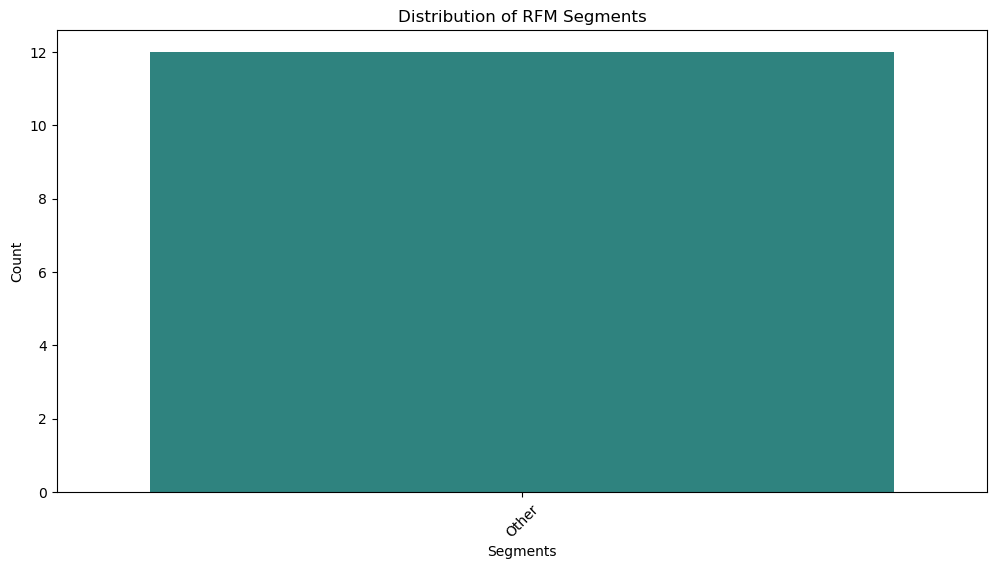

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for RFM segments
plt.figure(figsize=(12, 6))
sns.countplot(x='Segment', data=rfm_df, order=rfm_df['Segment'].value_counts().index, palette='viridis')
plt.title('Distribution of RFM Segments')
plt.xlabel('Segments')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

These strategies aim to be the strengths and  weaknesses of each segment 
to optimize customer satisfaction for all  business performance.
here strategies based on your specific business goals and industry dynamics.